#1. Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!ls -al '/gdrive/My Drive/Colab Notebooks/Darknet'

total 12
drwx------ 2 root root 4096 Jun  3 07:29 cfg
drwx------ 2 root root 4096 Jun  3 07:28 data
drwx------ 2 root root 4096 Jun  3 07:23 weights


In [ ]:
weight_file = '/gdrive/My Drive/Colab Notebooks/Darknet/weights/yolov3.weights'
cfg_file = '/gdrive/My Drive/Colab Notebooks/Darknet/cfg/yolov3.cfg'
name_file = '/gdrive/My Drive/Colab Notebooks/Darknet/data/coco.names'

#2. Load File

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
min_confidence = 0.5

In [ ]:
# load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

In [ ]:
classes = []
with open(name_file, 'r') as f:
  classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0,255,size=(len(classes),3))

In [ ]:
from google.colab import files
files.upload()

Saving russiancar.jpeg to russiancar.jpeg


{'russiancar.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 90\n\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x02\xfd\x05P\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A

2 2 car
4 2 car
5 2 car
7 2 car


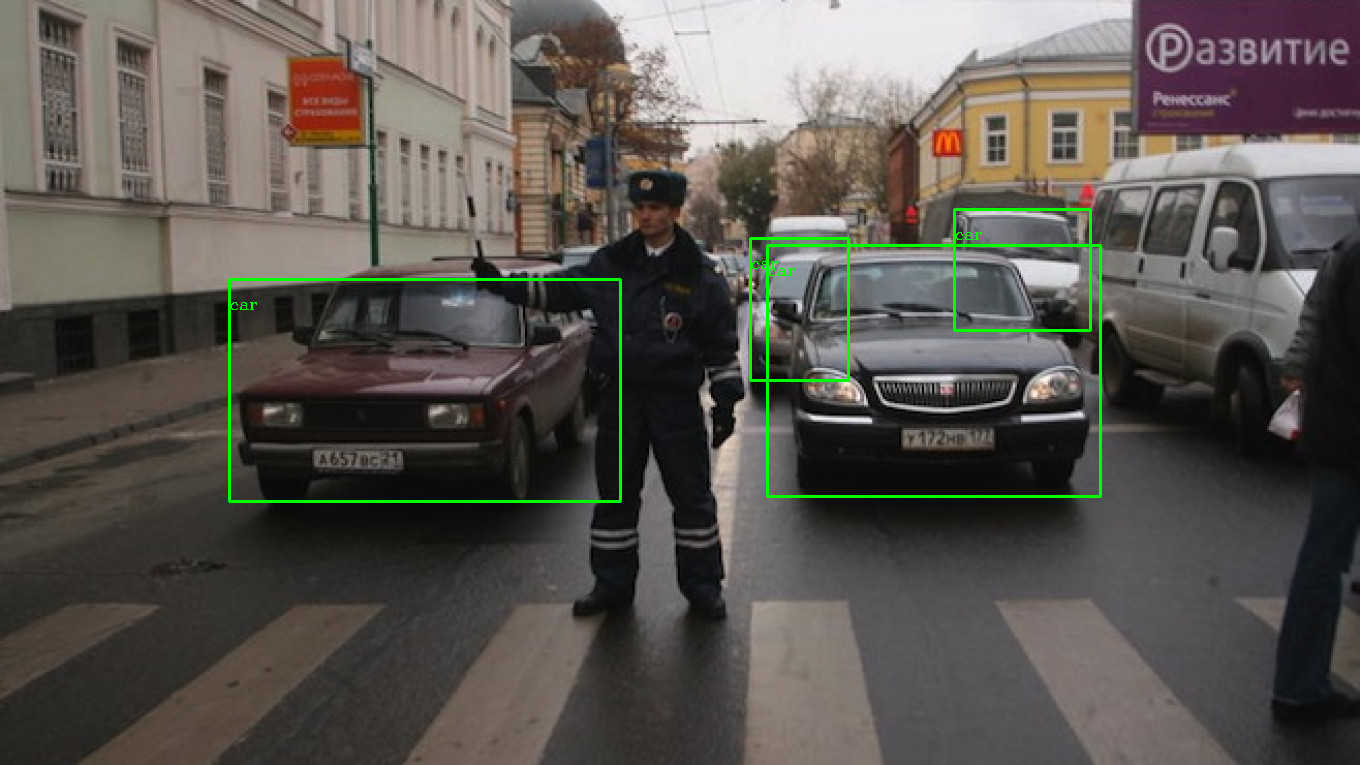

In [ ]:
img = cv2.imread('russiancar.jpeg')
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers) 

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
      if class_ids[i] == 2:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(i, class_ids[i], label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,255,0), 2)
        cv2.putText(img, label, (x, y + 30), font, 0.5, (0, 255, 0), 1)  

cv2_imshow(img)      

#3. Plate

In [ ]:
from google.colab import files
files.upload()

Saving haarcascade_russian_plate_number.xml to haarcascade_russian_plate_number (2).xml


{'haarcascade_russian_plate_number.xml': b'<?xml version="1.0"?>\n<opencv_storage>\n<cascade>\n  <stageType>BOOST</stageType>\n  <featureType>HAAR</featureType>\n  <height>20</height>\n  <width>60</width>\n  <stageParams>\n    <boostType>GAB</boostType>\n    <minHitRate>9.9500000476837158e-001</minHitRate>\n    <maxFalseAlarm>5.0000000000000000e-001</maxFalseAlarm>\n    <weightTrimRate>9.4999999999999996e-001</weightTrimRate>\n    <maxDepth>1</maxDepth>\n    <maxWeakCount>100</maxWeakCount></stageParams>\n  <featureParams>\n    <maxCatCount>0</maxCatCount>\n    <featSize>1</featSize>\n    <mode>ALL</mode></featureParams>\n  <stageNum>20</stageNum>\n  <stages>\n    <!-- stage 0 -->\n    <_>\n      <maxWeakCount>6</maxWeakCount>\n      <stageThreshold>-1.3110191822052002e+000</stageThreshold>\n      <weakClassifiers>\n        <_>\n          <internalNodes>\n            0 -1 193 1.0079263709485531e-002</internalNodes>\n          <leafValues>\n            -8.1339186429977417e-001 5.0277775

In [ ]:
!ls -al

total 2840
drwxr-xr-x 1 root root   4096 Jun  4 06:04  .
drwxr-xr-x 1 root root   4096 Jun  4 05:33  ..
-rw-r--r-- 1 root root  77963 Jun  4 05:33  car1.jpg
drwxr-xr-x 4 root root   4096 Jun  1 13:40  .config
-rw-r--r-- 1 root root  75482 Jun  4 05:57 'haarcascade_russian_plate_number (1).xml'
-rw-r--r-- 1 root root  75482 Jun  4 06:04 'haarcascade_russian_plate_number (2).xml'
-rw-r--r-- 1 root root  75482 Jun  4 05:40  haarcascade_russian_plate_number.xml
drwxr-xr-x 2 root root   4096 Jun  4 06:03  .ipynb_checkpoints
-rw-r--r-- 1 root root  60137 Jun  4 05:51  ruassiancar1.jpeg
-rw-r--r-- 1 root root 780429 Jun  4 05:57 'russiancar (1).jpeg'
-rw-r--r-- 1 root root  60137 Jun  4 06:00  russiancar1.jpeg
-rw-r--r-- 1 root root 964861 Jun  4 05:53  russiancar1.png
-rw-r--r-- 1 root root  60137 Jun  4 05:59 'russiancar (2).jpeg'
-rw-r--r-- 1 root root 191642 Jun  4 06:01  russiancar2.jpeg
-rw-r--r-- 1 root root  60137 Jun  4 06:00 'russiancar (3).jpeg'
-rw-r--r-- 1 root root 191642 Jun  4

In [ ]:
plate_cascade_name = 'haarcascade_russian_plate_number.xml'

In [ ]:
plate_cascade = cv2.CascadeClassifier()
if not plate_cascade.load(cv2.samples.findFile(plate_cascade_name)):
  print("File Load Error")
  exit(0)

2 2 car


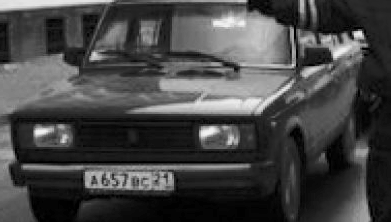

[[ 66 157 125  42]]
4 2 car


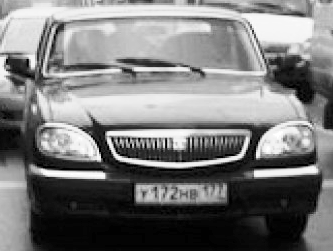

[[ 40 112 208  70]
 [119 171 121  40]]
5 2 car


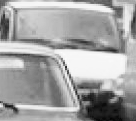

()
7 2 car


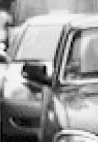

()


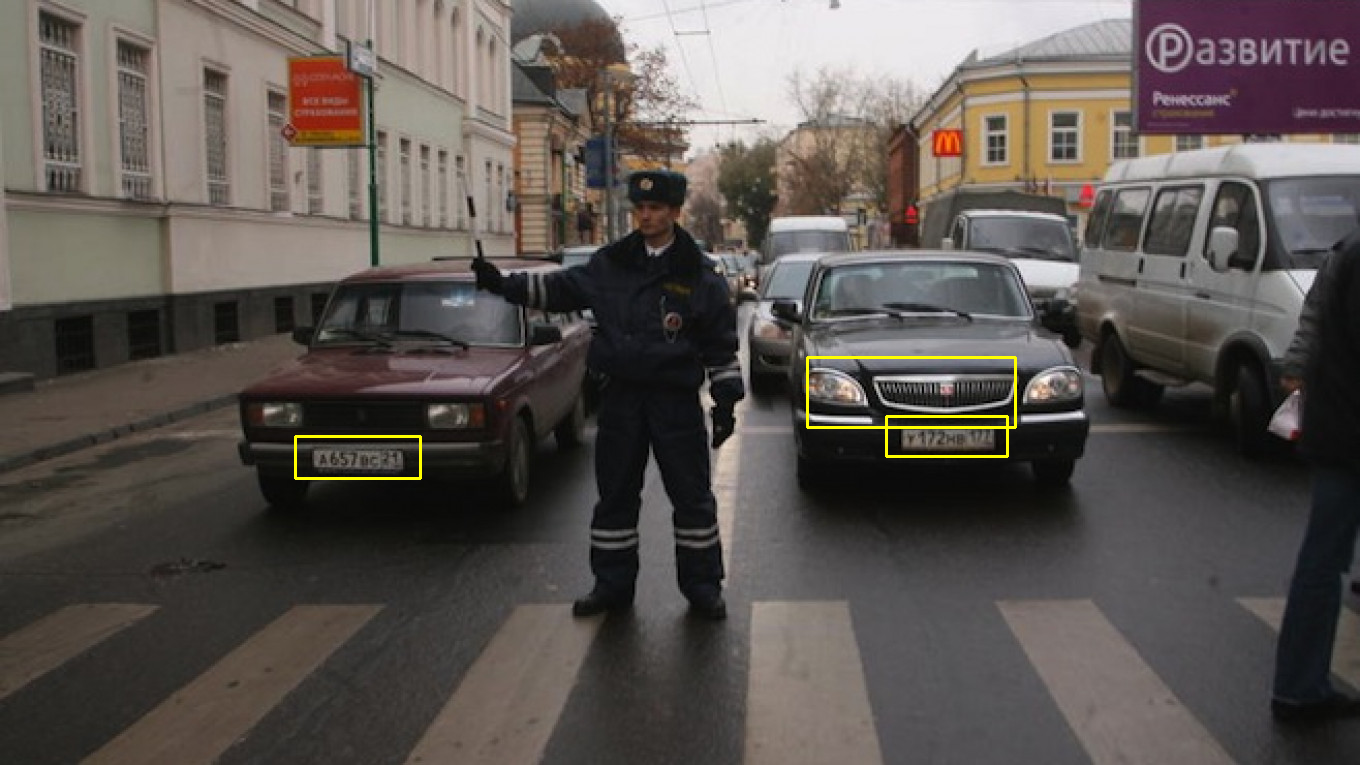

In [19]:
img = cv2.imread('russiancar.jpeg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers) 

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
      if class_ids[i] == 2:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(i, class_ids[i], label)
        color = colors[i]
        carROI = gray[y:y+h, x:x+w]
        cv2_imshow(carROI)
        plates = plate_cascade.detectMultiScale(carROI)
        print(plates)
        for (x2,y2,w2,h2) in plates:
          cv2.rectangle(img, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (0,255,255), 2)

cv2_imshow(img)      